<a href="https://colab.research.google.com/github/ZWael/MFP/blob/master/walkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/MFP

/content/drive/MyDrive/MFP


In [3]:
!ls

classification_example.py		      portraits
clustering_example.py			      README.md
Cohorts					      requirements.txt
From_cell_files.ipynb			      signatures
img					      upstream_html
license.md				      walkthrough.ipynb
Methods_Description_-_Batch_correction.ipynb


In [4]:
import pandas as pd

from portraits.clustering import clustering_profile_metrics, clustering_profile_metrics_plot
from portraits.utils import read_gene_sets, ssgsea_formula, median_scale

# Read signatures

In [5]:
gmt = read_gene_sets('signatures/gene_signatures.gmt') 

In [6]:
gmt['Angiogenesis']

# Read expressions

Here as an illustration we will use the Augustine cohort tsv file 

In [7]:
exp = pd.read_csv('Cohorts/Augustine/expressions.tsv.gz', sep='\t', index_col=0)

In [8]:
exp.head(3)

,GSM478912,GSM478913,GSM478914,GSM478915,GSM478916,GSM478917,GSM478918,GSM478919,GSM478920,GSM478921,GSM478922,GSM478923,GSM478924,GSM478925,GSM478926,GSM478927,GSM478928,GSM478929,GSM478930,GSM478931,GSM478932,GSM478933,GSM478934,GSM478935,GSM478936,GSM478937,GSM478938,GSM478939,GSM478940,GSM478941,GSM478942,GSM478943,GSM478944,GSM478945,GSM478946,GSM478947,GSM478948,GSM478949,GSM478950,GSM478951,GSM478952,GSM478953,GSM478954,GSM478955,GSM478956,GSM478957,GSM478958,GSM478959,GSM478960,GSM478961,GSM478962,GSM478963
A1BG,44.763856,40.570022,47.412206,38.605712,38.605712,40.570022,62.703348,65.154802,42.462892,63.506892,50.631081,58.726107,90.429749,55.581599,40.488149,40.488149,40.570022,40.570022,46.121590,40.570022,73.692913,29.866888,12.430196,24.352007,40.389534,40.570022,40.570022,36.901023,40.570022,40.488149,38.605712,38.839909,61.520251,56.481533,38.605712,30.610384,48.343300,47.984698,40.570022,39.493967,40.630873,60.481601,40.389534,71.057705,38.605712,38.605712,38.605712,51.893083,40.570022,41.630045,43.347984,40.580599
A1BG-AS1,11.488335,11.488335,11.488335,11.488335,11.027629,11.488335,9.592399,11.488335,11.488335,12.815479,6.642623,6.642623,20.763783,11.488335,26.547519,20.033015,8.674403,11.462431,11.488335,11.488335,8.456057,6.278581,8.742121,11.488335,11.488335,10.739871,11.488335,11.973254,11.488335,11.539418,21.694420,18.675556,15.152352,11.472025,13.119201,11.488335,11.488335,11.488335,14.638787,11.488335,13.458551,13.500383,7.667442,28.266160,14.659700,11.923393,11.488335,11.740566,17.106923,12.654538,16.938234,11.488335
A1CF,3.776700,3.776700,3.776700,3.776700,3.776700,4.047415,4.792049,3.776700,3.776700,3.776700,3.776700,6.057215,3.776700,3.776700,3.776700,4.311873,3.776700,3.776700,3.776700,3.776700,3.776700,3.776700,3.776700,3.776700,4.151728,3.776700,3.776700,3.776700,3.776700,3.776700,3.776700,3.776700,3.776700,4.138151,3.776700,3.776700,3.794919,3.776700,3.776700,3.783254,3.776700,3.776700,3.776700,3.776700,3.776700,9.769723,3.776700,3.776700,3.776700,3.776700,3.776700,3.776700


# Calc signature scores and scaling it

In [9]:
signature_scores = ssgsea_formula(exp.T, gmt) # her we transpose the expression table 
# Scale signatures
signature_scores_scaled = median_scale(signature_scores)

In [10]:
signature_scores_scaled.head(3)

,MHCI,MHCII,Coactivation_molecules,Effector_cells,T_cell_traffic,NK_cells,T_cells,B_cells,M1_signatures,Th1_signature,Antitumor_cytokines,Checkpoint_inhibition,Treg,T_reg_traffic,Neutrophil_signature,Granulocyte_traffic,MDSC,MDSC_traffic,Macrophages,Macrophage_DC_traffic,Th2_signature,Protumor_cytokines,CAF,Matrix,Matrix_remodeling,Angiogenesis,Endothelium,Proliferation_rate,EMT_signature
GSM478912,-2.602821,-7.350003,-0.400397,-0.457742,-1.714376,-1.041894,-0.213045,0.371731,0.466577,0.519831,-2.252631,-0.658572,0.203139,2.047850,-0.752990,0.140557,-2.109979,-2.541594,-2.547508,-2.410980,0.291442,-1.403598,-5.230648,-4.031180,-1.369586,-1.809785,-2.918018,3.649245,-1.403900
GSM478913,-2.645689,-6.595055,-0.556757,-0.424833,-1.694343,-0.887625,-0.295966,0.429264,1.213958,0.356238,-2.511562,-0.103307,1.112309,1.030445,-2.325240,-0.215443,-1.887350,-2.316983,-2.762238,-2.693558,1.406431,-0.980988,-5.198766,-3.925075,-1.196709,-1.905589,-2.625737,3.365133,-1.076704
GSM478914,-1.316890,-0.510827,-0.424608,-0.497104,-0.923038,0.528284,-0.281549,0.053692,1.415917,-1.409104,-1.221494,0.318119,1.167260,-0.732170,-0.778363,3.704550,1.598995,1.792117,-0.226896,0.748523,-1.265611,1.892360,0.198815,-0.137486,0.018985,0.902991,-0.709575,-1.151177,2.785649


Check the clustering within a range of 30 to 65% similarity.
>65% - usually graph is not connected; 
<30% - unreasonable correlation.

In [11]:
clustering_metrics = clustering_profile_metrics(signature_scores_scaled, threshold_mm=(.3, .65), step=.01)

100%|██████████| 35/35 [00:03<00:00, 11.34it/s]


In [12]:
clustering_metrics.head(3) # here some modification in the clustering.py were of necessity to run properly

,ch,db,sc,N,perc
0.30,9.64016,1.49864,0.0456935,4,GSM478912 4 GSM478913 4 GSM478931 4 G...
0.31,9.66657,1.56943,0.0715208,4,GSM478912 1 GSM478913 1 GSM478931 1 G...
0.32,9.39398,1.59702,0.0417743,4,GSM478912 1 GSM478913 1 GSM478931 1 G...


In [13]:
clustering_metrics.tail(3)

,ch,db,sc,N,perc
0.62,6.47137,1.33111,0.109662,10,GSM478912 2 GSM478913 2 GSM478946 ...
0.63,6.55356,1.31235,0.117893,10,GSM478912 10 GSM478913 10 GSM478946 1...
0.64,9.9731,1.09709,0.245867,12,GSM478912 1 GSM478913 1 GSM478914 ...


this table summarise the clustering metrics :

- ch: calinski_harabasz_score
- db: davies_bouldin_score
- sc: silhouette_score

ch db and sc as described in sklearn.metrics

- N: number of clusters
- perc: samples in each cluster


# Visualize the partitions

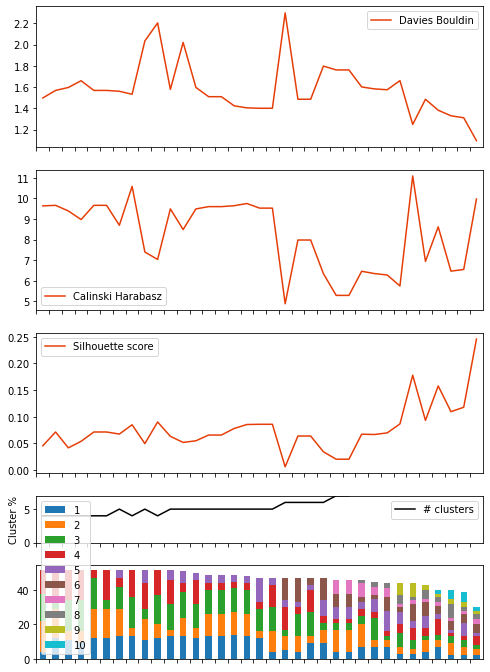

In [14]:
clustering_profile_metrics_plot(clustering_metrics) # he a typo correction in the  was of nessity

Note that the x axes is extended from the 0.30 to 0.64 the clustering range as explained in the previous paragraph 

For the illustration we will use 0.47 as the optimal threshold 

In [15]:
best_threshold = '0.47'

# Detect cluster types

In [19]:
# defining detect_type as fuction is better than defining it in the example walkthrough
from portraits.detect_type import detect_type 

In [18]:
final_clusters = detect_type(clustering_metrics, best_threshold, signature_scores_scaled)

In [20]:
final_clusters.head(3)

GSM478912    D
GSM478913    D
GSM478937    D
Name: MFP, dtype: object

# Exporting 

In [21]:
final_clusters.to_csv('final_clusters.tsv', sep='\t', index=True)